# District Exploratory Data Analysis

This notebook contains the inital district analysis. 

* Data overview
* Data distributions
* District Population
* District Housing
* District Enrichment Features
* Patterns and correlations

# Environment & Data

We prepare the enviromnet for EDA and load the created district master table.

In [1]:
# Bootstrap
import sys, os
import pandas as pd
import numpy as np

# Add repo root to path so imports work
sys.path.append(os.path.abspath(os.path.join("..", "..")))

from berlin_housing import config

# Vizualization settings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette("colorblind")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Load district master table
bezirk_master = pd.read_csv(config.BEZIRK_MASTER_OUT)

# Data Overview

In [3]:
bezirk_master.head(12)

,bezirk,district_total_bridges,district_bridges_city_streets,district_bridges_green_spaces,district_movie_theaters,district_total_cars,district_private_cars,district_private_cars_per_100_inhabitants,district_tourism_guests_2024,district_tourism_overnightstays_2024,district_tourism_overnightstays_change_2023_2024,district_street_trees,district_libraries,district_libraries_visits,district_libraries_borrowings,district_central_heating_percentage,district_heating,district_heating_percentage,district_floor_heating_percentage,district_block_heating_percentage,district_stove_heating_percentage,district_no_heating_percentage,district_gas_energy_percentage,district_oil_energy_percentage,district_mixed_energy_sources_percentage,district_solar_energy_percentage,district_wood_pellets_energy_percentage,district_biomass_energy_percentage,district_electric_energy_percentage,district_coal_energy_percentage,district_no_energy_source_percentage,district_housing_built_before_1950_percentage,1950-1969_percentage,1970-1989_percentage,1990-2009_percentage,district_housing_built_after_2010_percentage,district_total_apartments,district_occupied_by_owner_percentage,district_residential_rental_percentage,district_vacation_leisure_rental_percentage,district_empty_apartments,district_empty_apartments_percentage,district_average_living_space_m2,district_employed,district_employed_percentage,district_unemployed,district_unemployed_percentage,district_not_working,district_not_working_percentage,district_labor_force,district_male_labor_force,district_female_labor_force,district_total_households,district_single_households,district_couples_without_children,district_couples_without_children_percentage,district_couples_with_children,district_couples_with_children_percentage,district_single_parents,district_shared_apartments,district_only_seniors_households,district_apartment_owners,district_apartment_owner_percentage,district_apartment_tenants,district_apartment_tenant_percentage,2_person_EUR_per_squared_meter,district_apartment_average_rooms,2_person_average_rooms,district_average_persons_per_household,district_average_years_of_residence,district_full_time_employees,district_median_income,district_total_population,district_male_population,district_male_population_percentage,district_female_population,district_female_population_percentage,district_single_population,district_couples_population,district_widowed_population,district_divorced_population,district_other_civil_status_population,district_average_age,district_population_under_18,district_population_under_18_percentage,district_population_18_29,district_population_18_29_percentage,district_population_30_49,district_population_30_49_percentage,district_population_50_64,district_population_50_64_percentage,district_population_65_plus,district_population_65_plus_percentage,district_min_rent_m2,district_avg_rent_m2,district_max_rent_m2,district_min_Buy_m2,district_avg_buy_m2
0,charlottenburg-wilmersdorf,126,54,9,12,135928,96143,28.0,4041767,9554578,47160,42263,7,593574,1419015,45.4,8428.0,43.7,9.5,0.8,0.5,0.1,38.1,16.3,43.7,0.9,0.3,0.0,0.5,0.1,0.1,54.7,26.2,10.8,4.6,3.7,194159.0,16.3,80.9,0.3,4821.0,2.5,77.70,157160.0,51.1,13520.0,4.4,136880.0,44.5,170680.0,85750.0,84930.0,187477.0,120247.0,25457.0,13.6,22500.0,12.0,11882.0,7392.0,49968.0,31398.0,16.7,156006.0,83.2,8.31,3.3,3.8,1.7,13.2,79654,4398,317079.0,150770.0,47.6,166238.0,52.4,162685.0,100977.0,18499.0,33622.0,1230.0,45.0,44463.0,14.0,45878.0,14.5,84811.0,26.8,67044.0,21.1,74816.0,23.6,11.967500,16.982500,28.567500,3635.500000,6172.250000
1,friedrichshain-kreuzberg,40,34,5,11,60196,50147,17.1,3352293,8564603,547842,16520,6,528940,1572879,40.8,4128.0,37.6,18.4,1.9,1.3,0.0,55.8,4.3,37.6,0.3,0.4,0.3,0.8,0.5,0.0,60.8,16.8,10.9,6.4,5.1,157555.0,8.4,89.5,0.1,3181.0,2.0,67.86,151700.0,58.7,12760.0,4.9,94010.0,36.4,164470.0,86880.0,77590.0,153287.0,97888.0,15331.0,10.0,17855.0,11.6,12004.0,10212.0,17732.0,13153.0,8.6,140111.0,91.4,8.18,3.1,3.5,1.7,11.8,73484,45

In [4]:
print("Rows and Columns: ", bezirk_master.shape)
bezirk_master.info()

Rows and Columns:  (12, 98)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 98 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   bezirk                                            12 non-null     object 
 1   district_total_bridges                            12 non-null     int64  
 2   district_bridges_city_streets                     12 non-null     int64  
 3   district_bridges_green_spaces                     12 non-null     int64  
 4   district_movie_theaters                           12 non-null     int64  
 5   district_total_cars                               12 non-null     int64  
 6   district_private_cars                             12 non-null     int64  
 7   district_private_cars_per_100_inhabitants         12 non-null     float64
 8   district_tourism_guests_2024                      12 non-null     int64  


The data has 12 columns, one for each district. There are no null values in the 98 columns.

* **District Identifier** (bezirk — Name of the district `Bezirk`)
* **Infrastructure & Mobility** (bridges, cars)
* **Culture & Tourism** (movie theaters, libraries, tourists, overnight stays, change 2023 to 2024)
* **Environment** (trees)
* **Heating Systems** (% of housing units)
* **Energy Sources** (% of housing units)
* **Housing Stock** (built year, total apartments, owners vs tenants, residentual vs leisure, empty apartments, average living space)
* **Employment & Labor** (employed, unemployed, not working (not part of the labor force), female vs male employees, median income)
* **Households** (total households, average household size, singles, couples (with and without children), single parents, WGs (shared flats), senior households, years of residence)
* **Demographics & Population** (total population, male vs female, singles, couples, widowed, divorced, average age)
* **Age Groups** (-18, 18-29, 30-49, 50-64, 65+)
* **Housing Market** (average rent per m², minimum rent per m², max rent per m², average purchase price per m²)


# Distributions

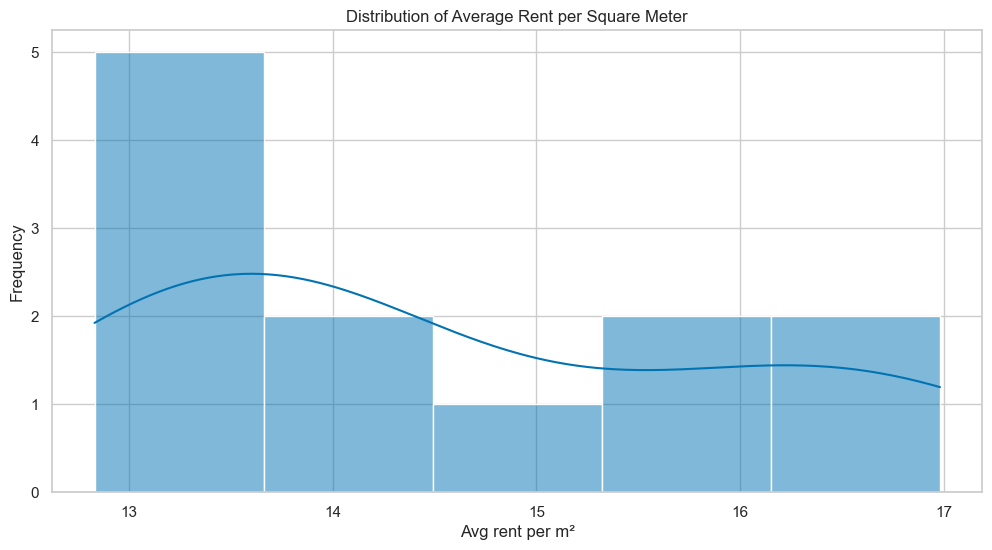

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(bezirk_master["district_avg_rent_m2"], kde=True)
plt.title("Distribution of Average Rent per Square Meter")
plt.xlabel("Avg rent per m²")
plt.ylabel("Frequency")
plt.show()

The average rent distribution plot shows that the most frequent rent per m² is around 13 to 14 euro. The average rent spans from 13 to 17 euro.

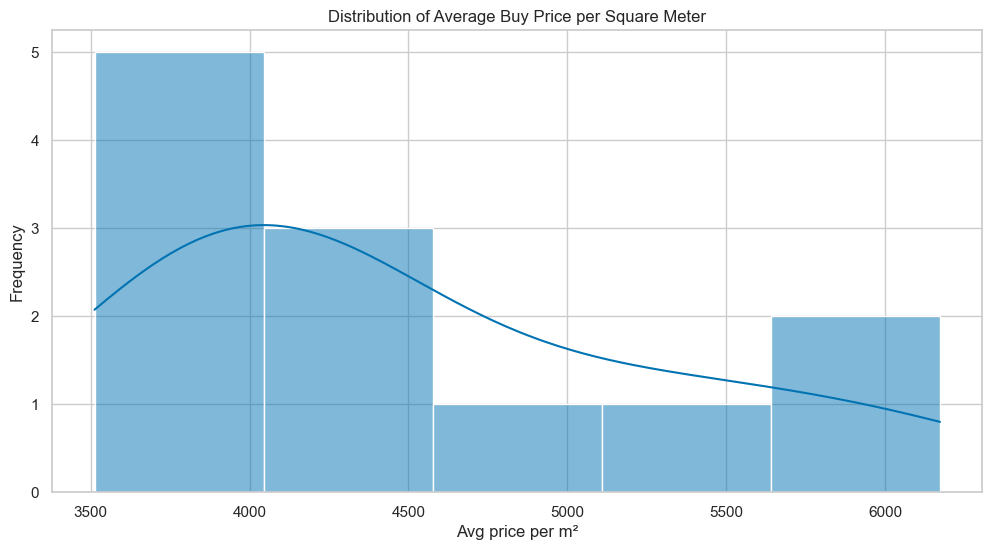

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(bezirk_master["district_avg_buy_m2"], kde=True)
plt.title("Distribution of Average Buy Price per Square Meter")
plt.xlabel("Avg price per m²")
plt.ylabel("Frequency")
plt.show()

The average purchase price is most frequent around 3500 to 4000 euro per m² and ranges from 3500 to 6000 euro per m².

# District Population

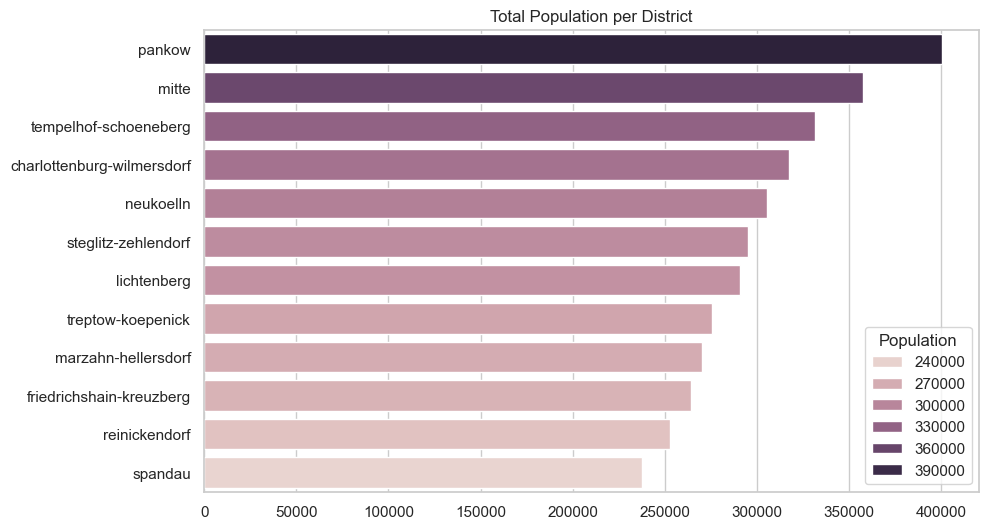

In [17]:
pop_sorted = bezirk_master.sort_values("district_total_population", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="district_total_population", y="bezirk", data=pop_sorted, hue="district_total_population")
plt.title("Total Population per District")
plt.xlabel("")
plt.ylabel("")
plt.legend(title="Population")
plt.show()

* Pankow has the highes population (around 390,000) with Mitte as a close second (360,000)
* Neukölln, Steglitz-Zehlendorf, and Lichtenberg have moderate population compared to the other districts
* Spandau and Reinickendorf are the least populated districts

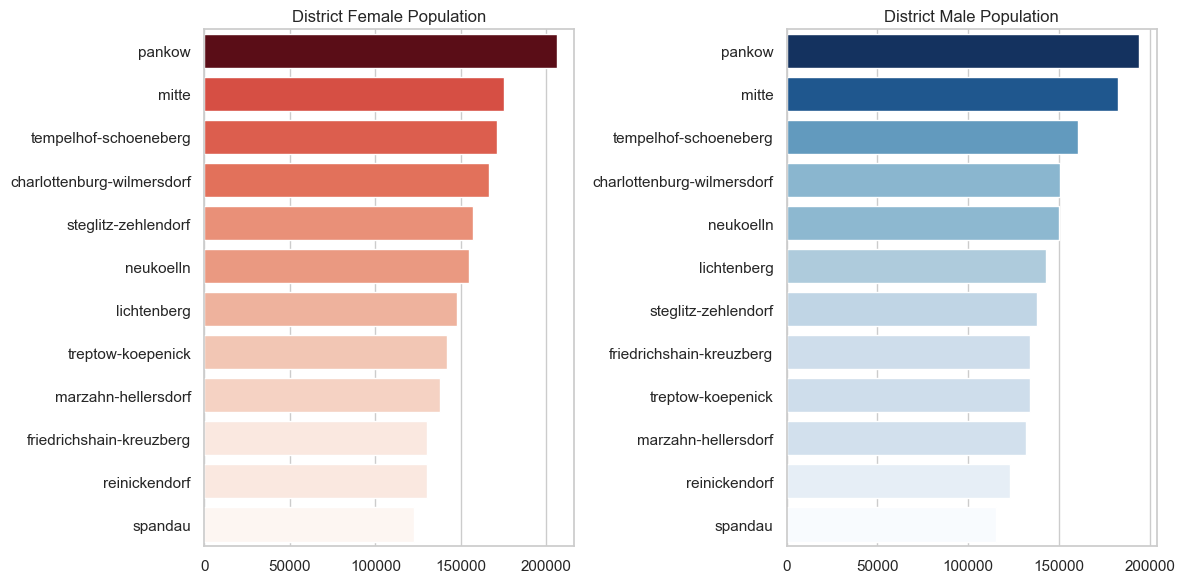

In [20]:
plt.figure(figsize=(12, 6))

# Female population
plt.subplot(1,2,1)
sns.barplot(
    data=bezirk_master.sort_values("district_female_population", ascending=False),
    x="district_female_population", 
    y="bezirk", 
    hue="district_female_population",
    palette="Reds",
    legend=False
)
plt.title("District Female Population")
plt.xlabel("")
plt.ylabel("")

# Male population
plt.subplot(1,2,2)
sns.barplot(
    data=bezirk_master.sort_values("district_male_population", ascending=False),
    x="district_male_population", 
    y="bezirk", 
    hue="district_male_population",
    palette="Blues",
    legend=False
)
plt.title("District Male Population")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

* Mitte is the only district that has more men than women
* The district female and male population reflects the total population chart


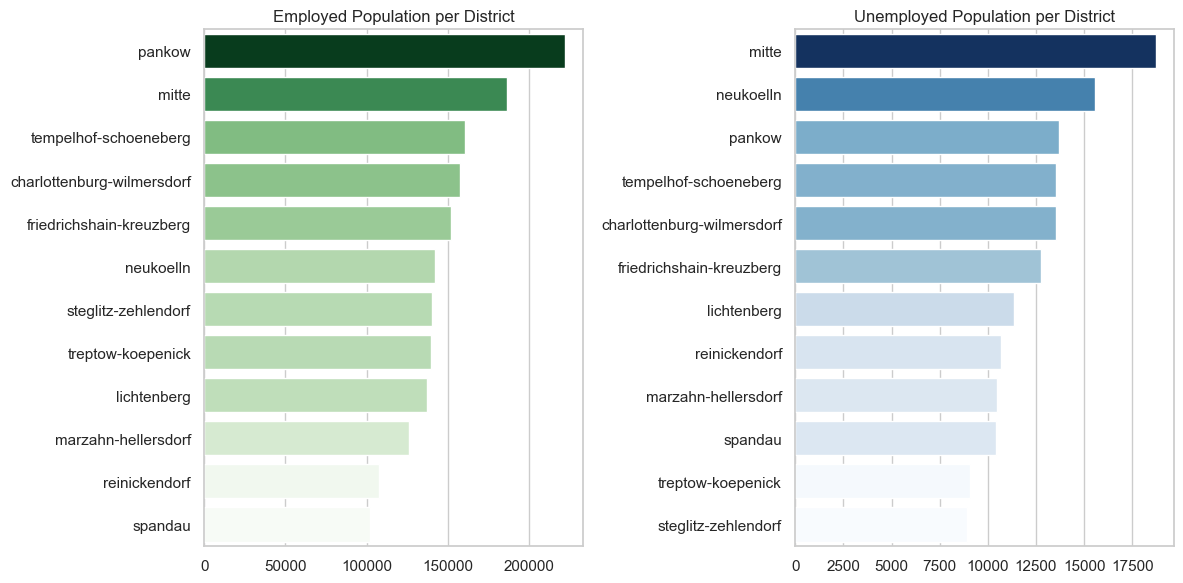

In [75]:
plt.figure(figsize=(12, 6))

# Female population
plt.subplot(1,2,1)
sns.barplot(
    data=bezirk_master.sort_values("district_employed", ascending=False),
    x="district_employed", 
    y="bezirk", 
    hue="district_employed",
    palette="Greens",
    legend=False
)
plt.title("Employed Population per District")
plt.xlabel("")
plt.ylabel("")

# Male population
plt.subplot(1,2,2)
sns.barplot(
    data=bezirk_master.sort_values("district_unemployed", ascending=False),
    x="district_unemployed", 
    y="bezirk", 
    hue="district_unemployed",
    palette="Blues",
    legend=False
)
plt.title("Unemployed Population per District")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

* There are a lot more employed people than unemployed people in general
* Pankow has the most employment but also ranks third for unemployment
* Mitte has the most unemplyment but ranks second for employed

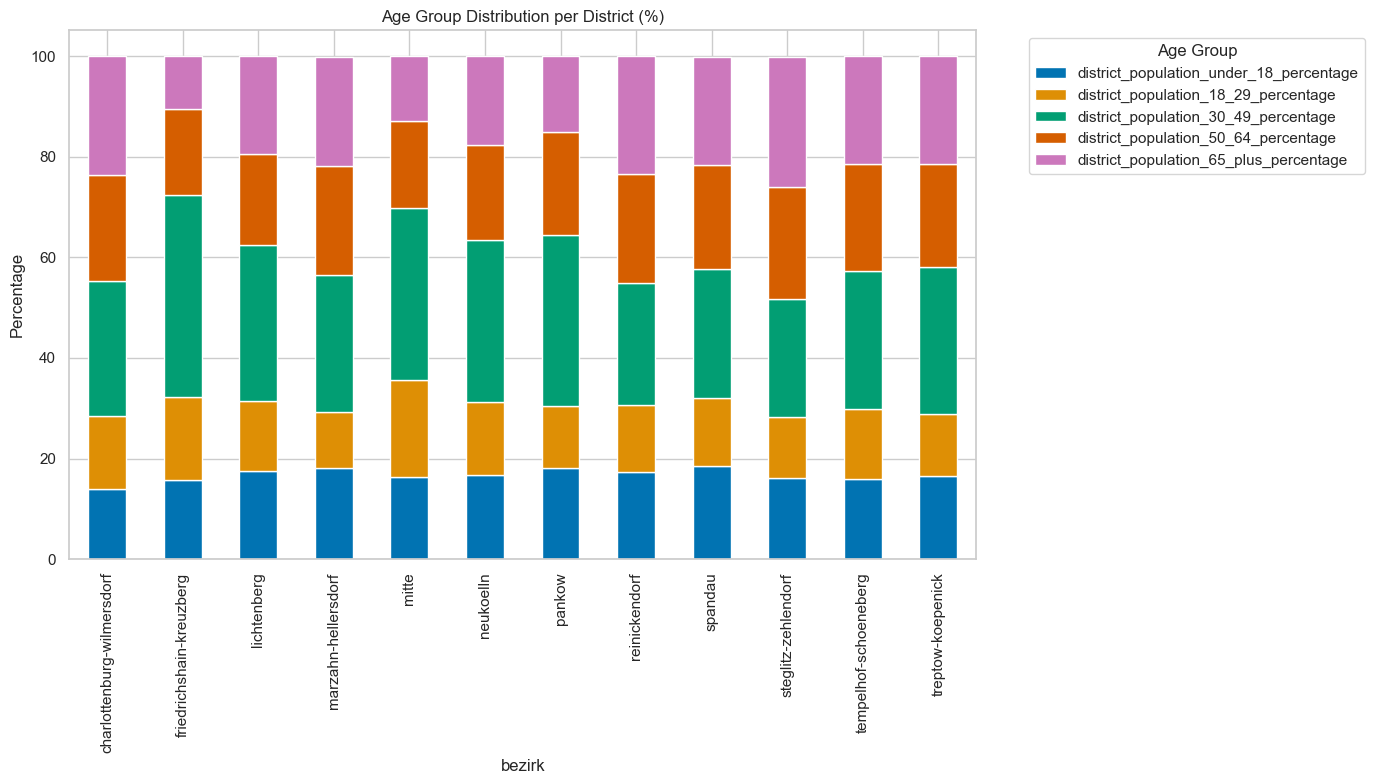

In [23]:
# Age distribution by category
age_cols = [
    "district_population_under_18_percentage",
    "district_population_18_29_percentage",
    "district_population_30_49_percentage",
    "district_population_50_64_percentage",
    "district_population_65_plus_percentage"
]

age_df = bezirk_master[["bezirk"] + age_cols].set_index("bezirk")

age_df.plot(kind="bar", stacked=True, figsize=(14,8))
plt.title("Age Group Distribution per District (%)")
plt.ylabel("Percentage")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* The most common age in all districts is between 30 and 49 years old
* Steglitz-Zehlendorf has the biggest middle age and senior population (+50)
* The most people below 18 years old are in Marzahn-Hellersdorf, Pankow, and Spandau

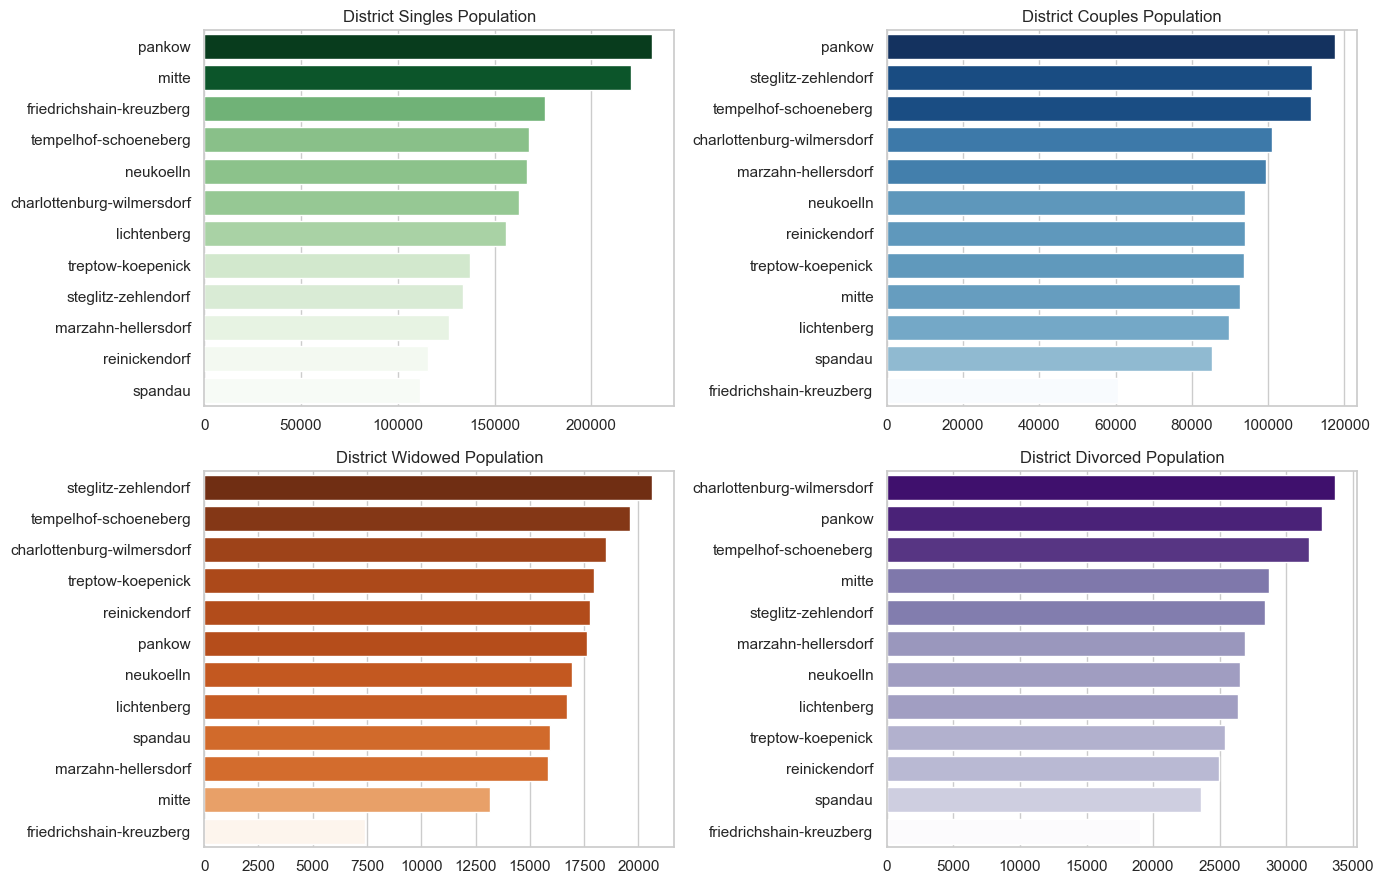

In [84]:
# Create visualization for district demographics
plt.figure(figsize=(14, 9))

plt.subplot(2,2,1)
sns.barplot(
    data=bezirk_master.sort_values("district_single_population", ascending=False),
    x="district_single_population", 
    y="bezirk", 
    hue="district_single_population",
    palette="Greens",
    legend=False
)
plt.title("District Singles Population")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,2,2)
sns.barplot(
    data=bezirk_master.sort_values("district_couples_population", ascending=False),
    x="district_couples_population",
    y="bezirk",
    hue="district_couples_population",
    palette="Blues",
    legend=False
)
plt.title("District Couples Population")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,2,3)
sns.barplot(
    data=bezirk_master.sort_values("district_widowed_population", ascending=False),
    x="district_widowed_population",
    y="bezirk",
    hue="district_widowed_population",
    palette="Oranges",
    legend=False
)
plt.title("District Widowed Population")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,2,4)
sns.barplot(
    data=bezirk_master.sort_values("district_divorced_population", ascending=False),
    x="district_divorced_population",
    y="bezirk",
    hue="district_divorced_population",
    palette="Purples",
    legend=False
)
plt.title("District Divorced Population")
plt.xlabel("")
plt.ylabel("")

plt.tight_layout()

* Pankow and Mitte have the highest singles amount, while Pankow also has the most couples. This makes sense as we saw earleir that Pankow has the highest total population
* Steglitz-Zehlendorf and Tempelhof-Schönenberg have a lot of couples but also widowed people
* Charlottenburg-Wilmersdorf, Pankow, and Tempeflhof-Schönenberg have the most divorced people 

# District Housing

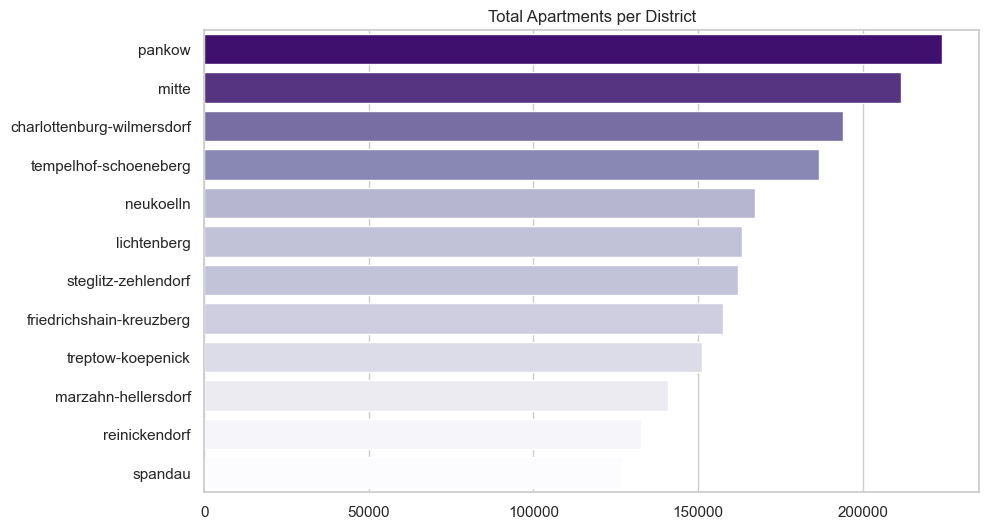

In [87]:
# Apartments per district
plt.figure(figsize=(10,6))
sns.barplot(
    data=bezirk_master.sort_values("district_total_apartments", ascending=False),
    x="district_total_apartments",
    y="bezirk",
    hue="district_total_apartments",
    palette="Purples",
    legend=False
)
plt.title("Total Apartments per District")
plt.xlabel("")
plt.ylabel("")
plt.show()

Pankow has the most total apartments, closly followed by Mitte which reflects the total population.

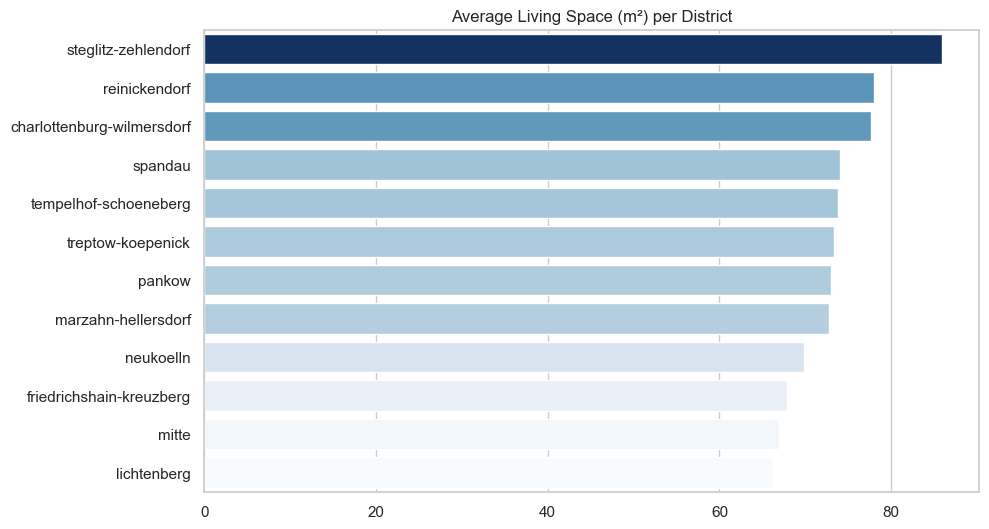

In [88]:
# Living space
plt.figure(figsize=(10,6))
sns.barplot(
    data=bezirk_master.sort_values("district_average_living_space_m2", ascending=False),
    x="district_average_living_space_m2",
    y="bezirk",
    hue="district_average_living_space_m2",
    palette="Blues",
    legend=False
)
plt.title("Average Living Space (m²) per District")
plt.xlabel("")
plt.ylabel("")
plt.show()

While Reinickendorf is at the bottom of the charts in total apartments it is scores second for the highest average living space.

Mitte on the other hand has a high amount of total apartments but is second to last in the chart for average living space.

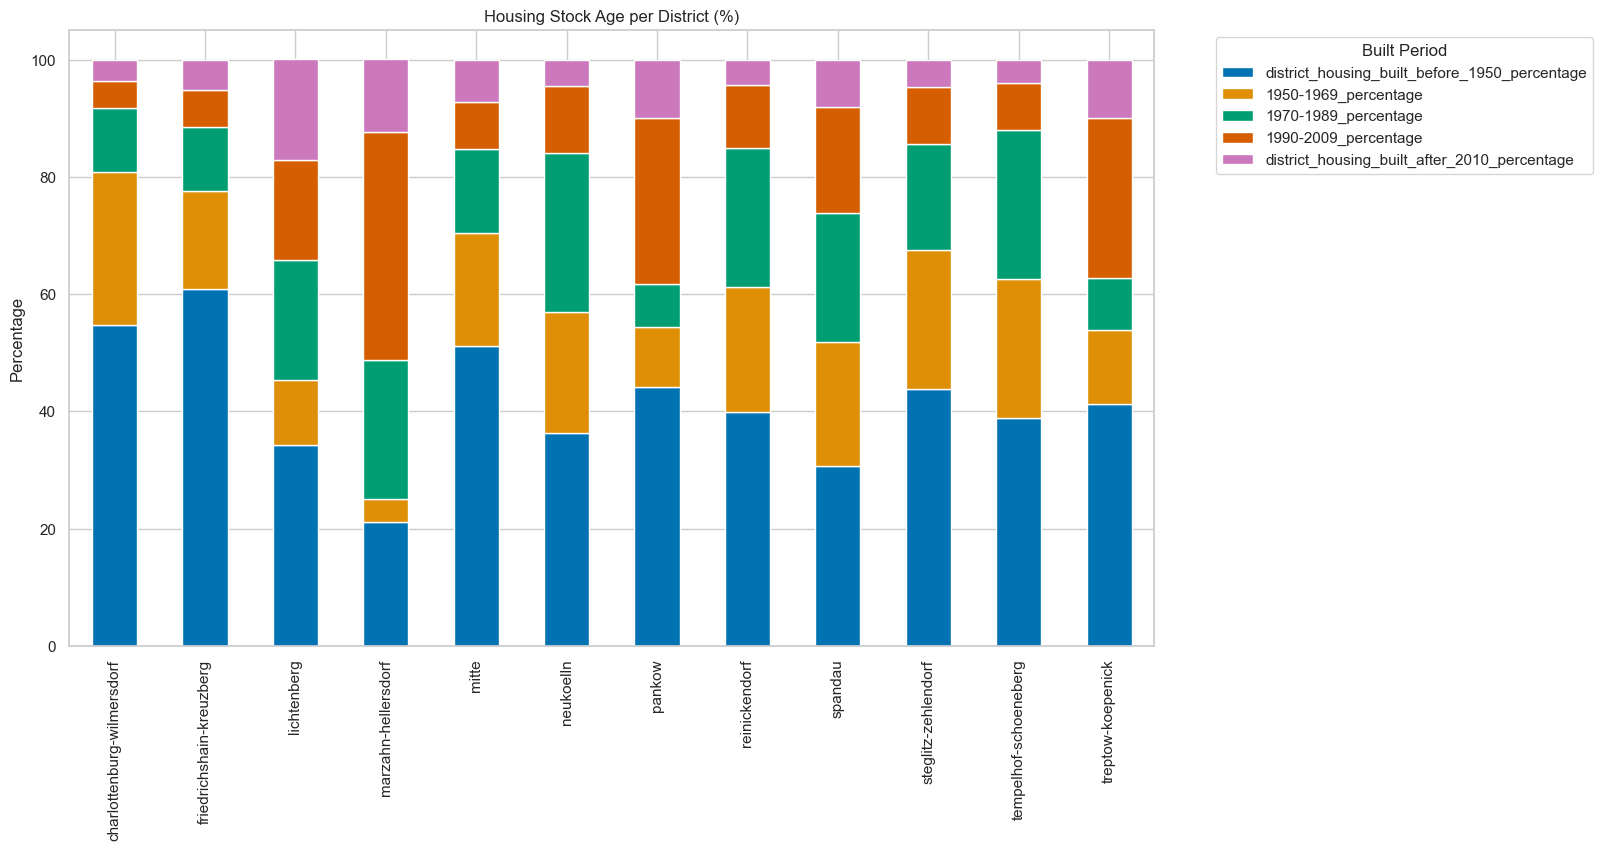

In [43]:
# Housing built period distribution
built_cols = ["district_housing_built_before_1950_percentage",
              "1950-1969_percentage","1970-1989_percentage",
              "1990-2009_percentage","district_housing_built_after_2010_percentage"]

built_df = bezirk_master[["bezirk"] + built_cols].set_index("bezirk")
built_df.plot(kind="bar", stacked=True, figsize=(14,8))
plt.title("Housing Stock Age per District (%)")
plt.ylabel("Percentage")
plt.xlabel("")
plt.legend(title="Built Period", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Most districts have most buildings that were built before 1950. 
In Marzahn-Hellersdorf most buildings were built between 1990 and 2009.
In many districts a noticable amount of buildings were built between 1970 and 1989.

# District Enrichment Features

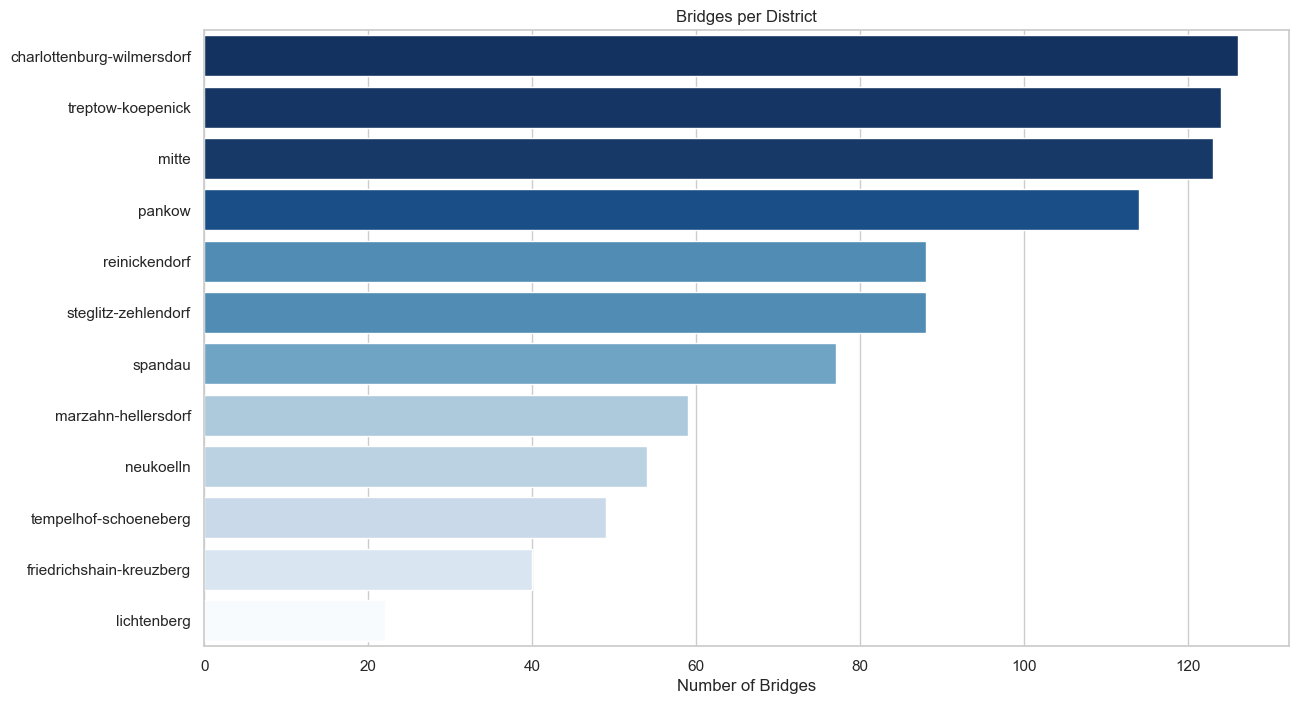

In [89]:
plt.figure(figsize=(14,8))
sns.barplot(data=bezirk_master.sort_values("district_total_bridges", ascending=False),
            x="district_total_bridges", y="bezirk", hue="district_total_bridges", palette="Blues", legend=False)
plt.title("Bridges per District")
plt.xlabel("Number of Bridges"); plt.ylabel("")
plt.show()

Most bridges are found in Charlottenburg-Wilmersdorf, Treptow-Köpenick, and Mitte have the most bridges while in Friedrichshain-Kreuzber and Lichtenberg you find the least amount of bridges compared to the other districts.

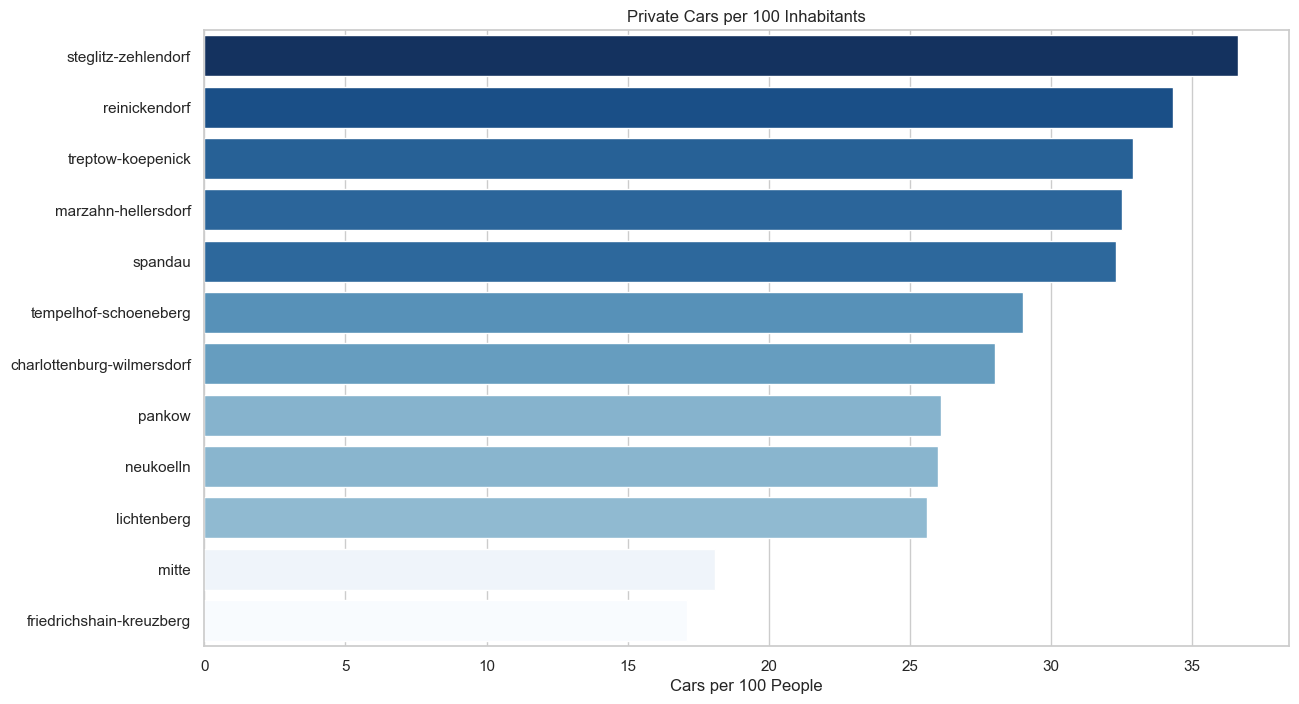

In [90]:
plt.figure(figsize=(14,8))
sns.barplot(data=bezirk_master.sort_values("district_private_cars_per_100_inhabitants", ascending=False),
            x="district_private_cars_per_100_inhabitants", y="bezirk", hue="district_private_cars_per_100_inhabitants", palette="Blues", legend=False)
plt.title("Private Cars per 100 Inhabitants")
plt.xlabel("Cars per 100 People"); plt.ylabel("")
plt.show()

Steglitz-Zehlendorf has the most cars per 100 inhabitants. The districts on the outer side have more cars per 100 inhabitants while the more central districts have the least amount of cars. This reflects Berlin public transport system that is highly used.

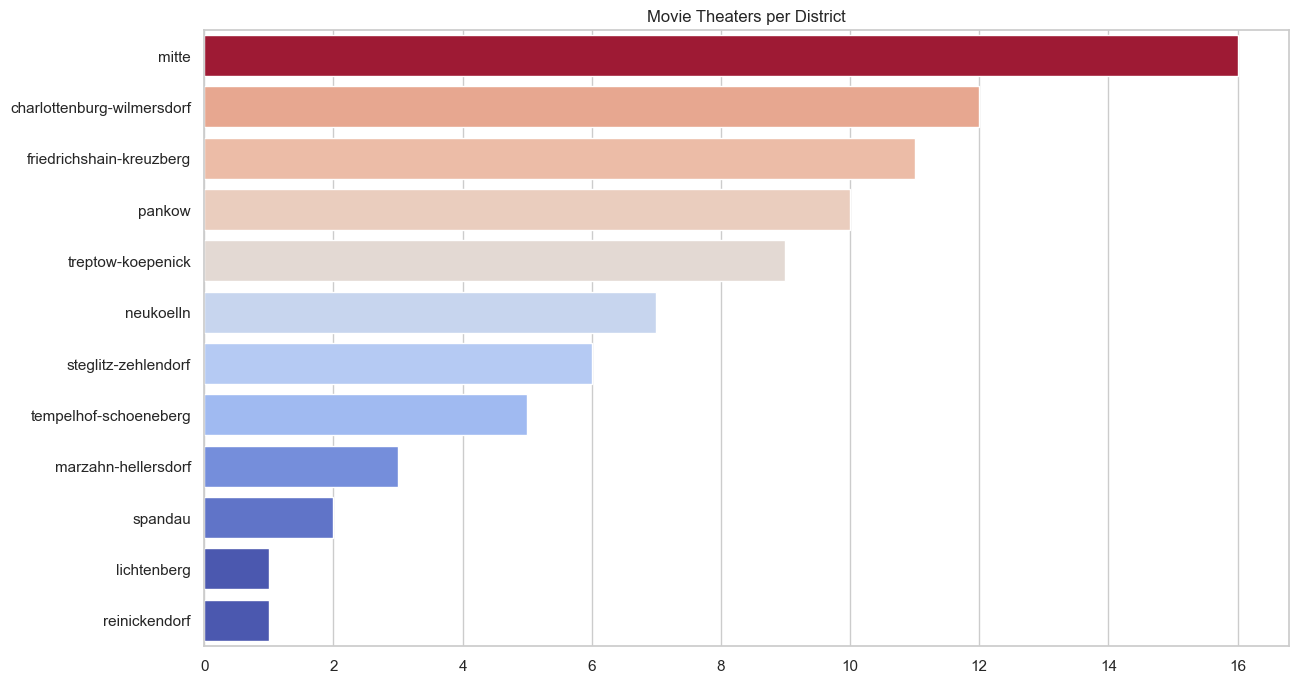

In [91]:
plt.figure(figsize=(14,8))
sns.barplot(data=bezirk_master.sort_values("district_movie_theaters", ascending=False),
            x="district_movie_theaters", y="bezirk", hue="district_movie_theaters", palette="coolwarm", legend=False)
plt.title("Movie Theaters per District")
plt.xlabel(""); plt.ylabel("")
plt.show()

Mitte has the most movie theaters (16) With Lichtenberg and Reinickendorf both only have 1 movie theater.

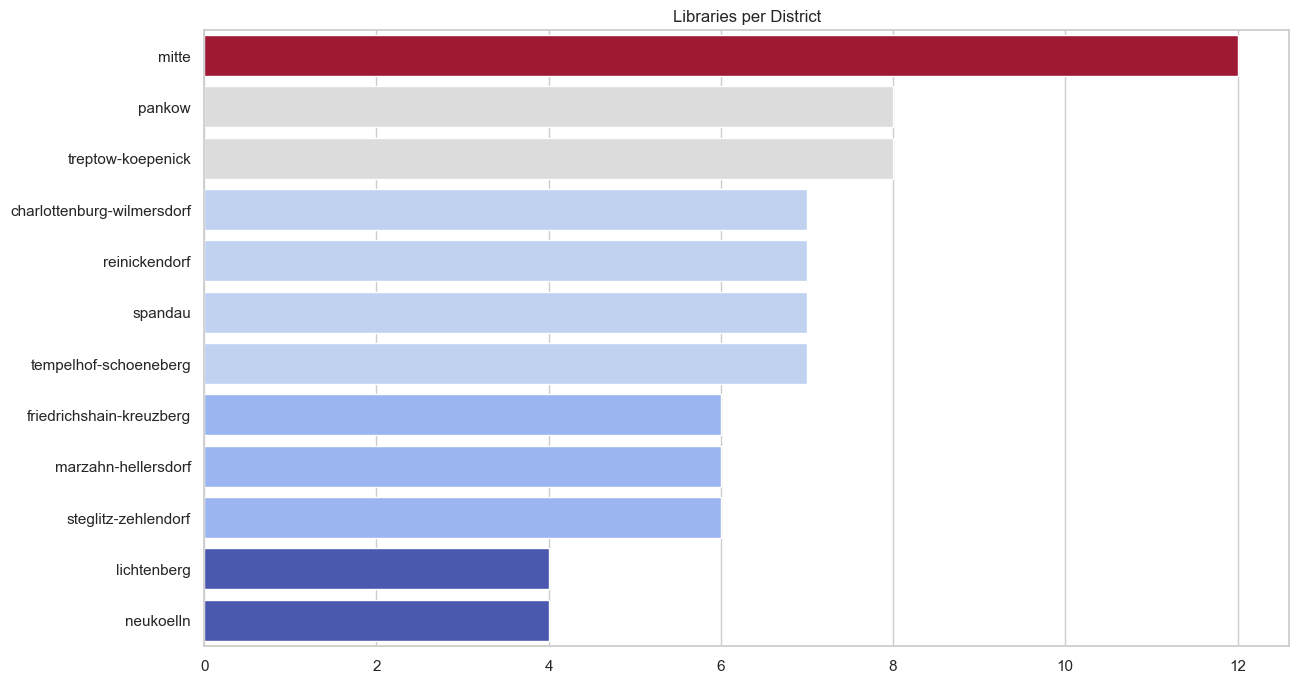

In [92]:
plt.figure(figsize=(14,8))
sns.barplot(data=bezirk_master.sort_values("district_libraries", ascending=False),
            x="district_libraries", y="bezirk", hue="district_libraries", palette="coolwarm", legend=False)
plt.title("Libraries per District")
plt.xlabel(""); plt.ylabel("")
plt.show()

Mitte also has the most libraries (12), followed by Pankow and Treptow-Köpenick (8). The least libraries are in Lichtenberg and Neukölln (4).

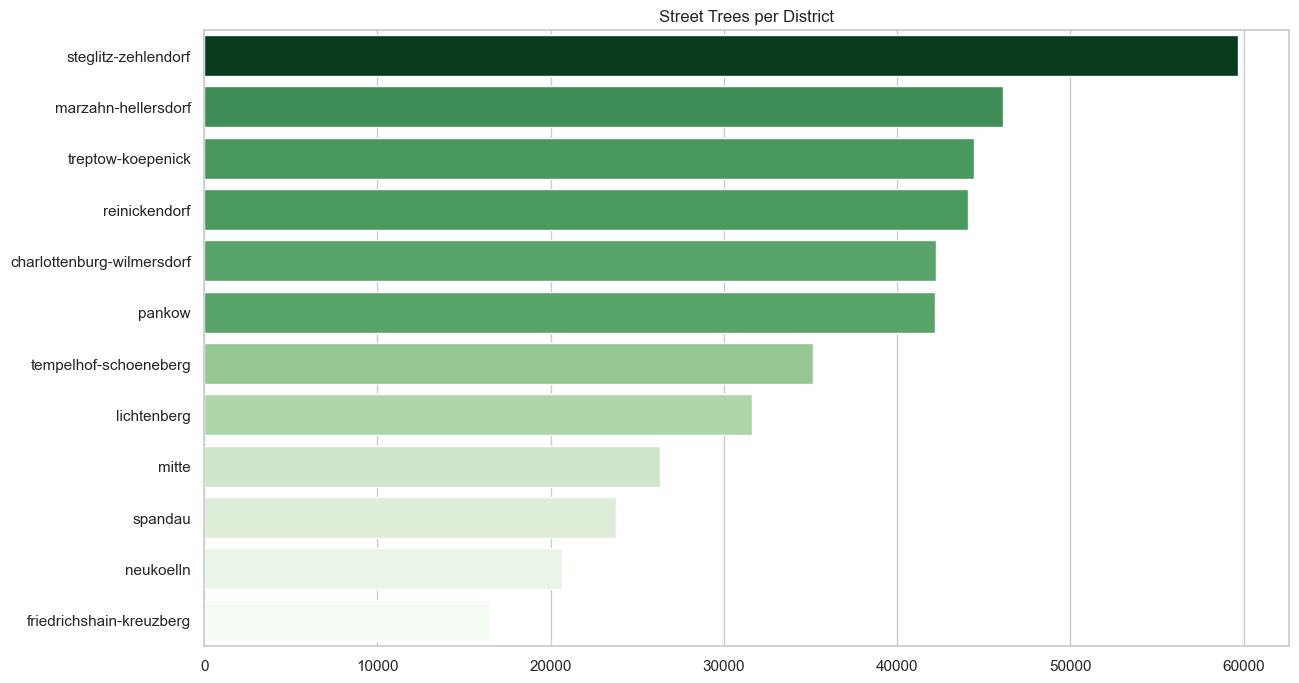

In [61]:
plt.figure(figsize=(14,8))
sns.barplot(data=bezirk_master.sort_values("district_street_trees", ascending=False),
            x="district_street_trees", y="bezirk", hue="district_street_trees", palette="Greens", legend=False)
plt.title("Street Trees per District")
plt.xlabel(""); plt.ylabel("")
plt.show()

Steglitz-Zehlendorf has the most street trees in Berlin with a difference of more than 10 000 trees with Marzahn-Hellersdorf which ranks second.

Friedrichshain-Kreuzberg and Neukölln rank lower but still both have more than 20 000 trees. Spandau has the least amount of treet with around 15 000 trees.

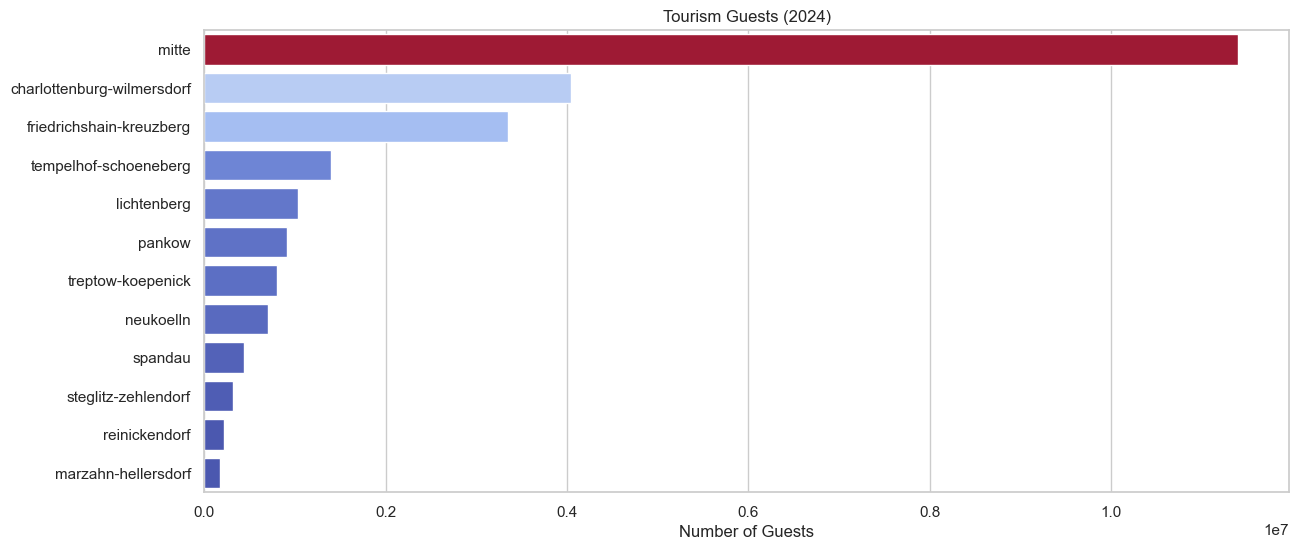

In [93]:
plt.figure(figsize=(14,6))
sns.barplot(data=bezirk_master.sort_values("district_tourism_guests_2024", ascending=False),
            x="district_tourism_guests_2024", y="bezirk", hue="district_tourism_guests_2024", palette="coolwarm", legend=False)
plt.title("Tourism Guests (2024)")
plt.xlabel("Number of Guests"); plt.ylabel("")
plt.show()

Mitte has by far the most tourist in Berlin which reflects the central location of Mitte with vast amount of hotels and hostels.

Tourist also like to stay in Charlottenburg-Wilmersdorf and Friedrichshain-Kreuzberg but rarely stay in Steglitz-Zehlendorf, Reinickendorf, and Marzahn-Hellersdorf.

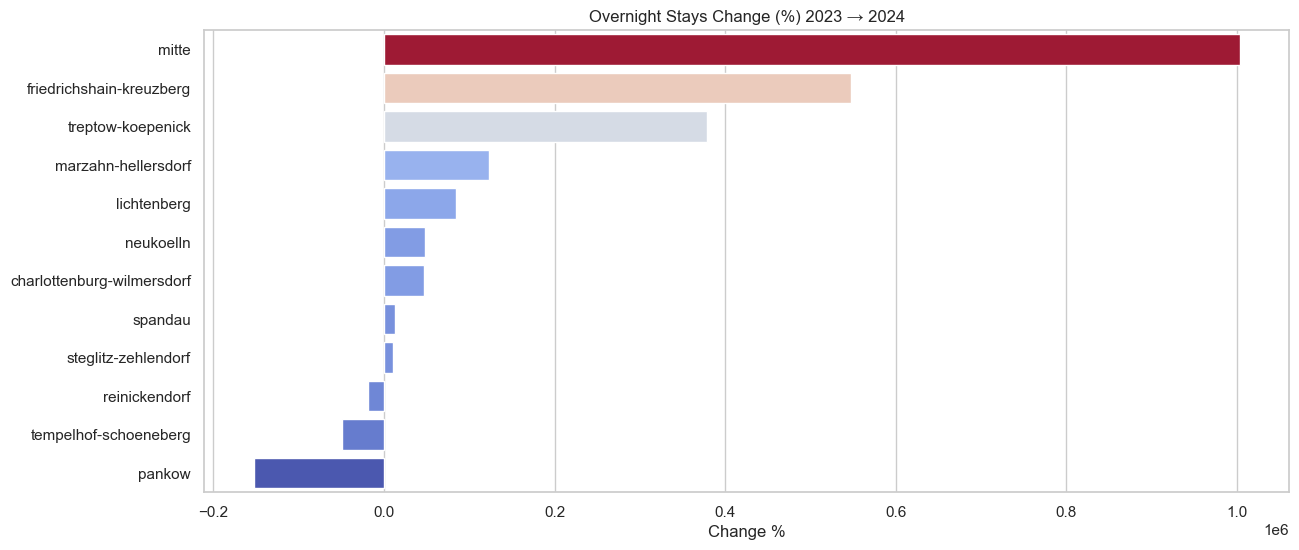

In [94]:
plt.figure(figsize=(14,6))
sns.barplot(data=bezirk_master.sort_values("district_tourism_overnightstays_change_2023_2024", ascending=False),
            x="district_tourism_overnightstays_change_2023_2024", y="bezirk", hue="district_tourism_overnightstays_change_2023_2024", palette="coolwarm", legend=False)
plt.title("Overnight Stays Change (%) 2023 → 2024")
plt.xlabel("Change %"); plt.ylabel("")
plt.show()

Compared to 2023 Mitte saw a big addition in overnight stays while Pankow, Tempelhof-Schönenberg, and Reinickendorf saw a decline.

# Correlations

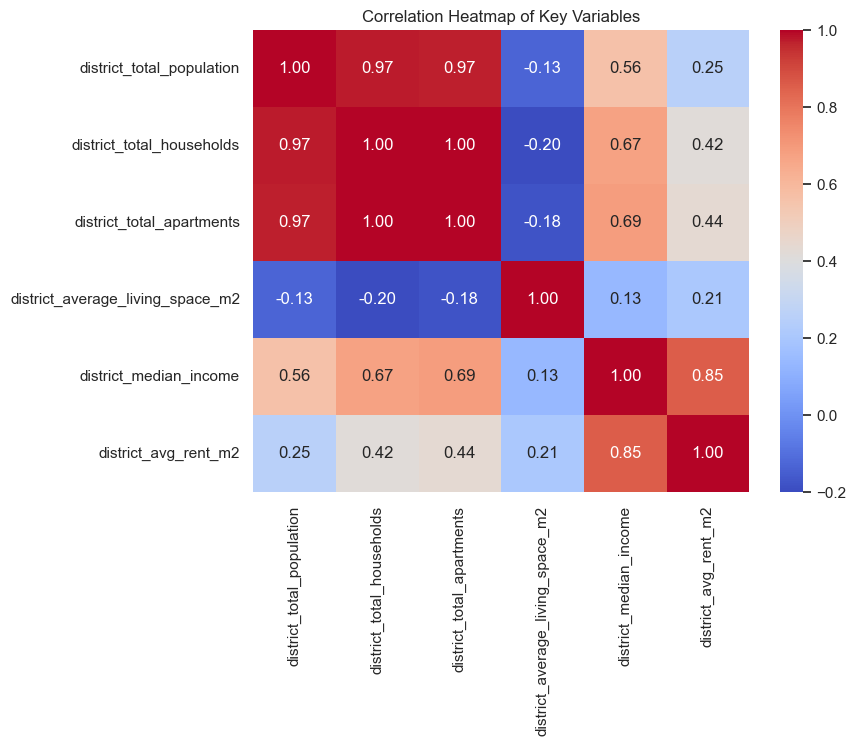

In [69]:
# Correlation heatmap
key_cols = [
    "district_total_population","district_total_households","district_total_apartments",
    "district_average_living_space_m2","district_median_income","district_avg_rent_m2"
]

plt.figure(figsize=(8,6))
sns.heatmap(bezirk_master[key_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Variables")
plt.show()

Total households and total population have a perfect correlation of 1.00, while total population and total apartments are also highly correlated.

Median income also has a correlation above 0.50 with total population, total households, total apartments, and average rent.


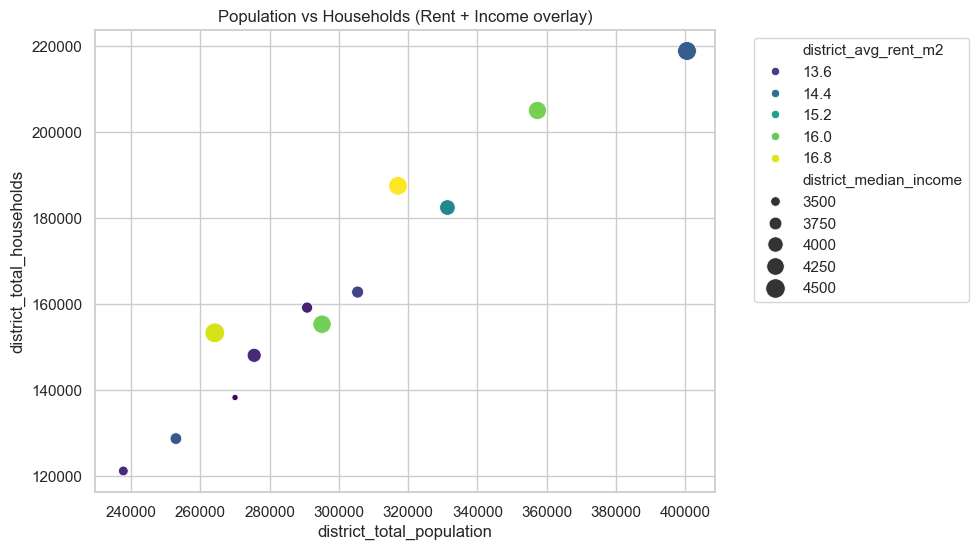

In [73]:
# Population vs households
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=bezirk_master,
    x="district_total_population", 
    y="district_total_households",
    hue="district_avg_rent_m2", size="district_median_income", sizes=(20,200), palette="viridis"
)
plt.title("Population vs Households (Rent + Income overlay)")
plt.legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We see that the highest average rent also has the highest median income.

While one district has high median income and a lower average rent (Top right blue dot)